In [79]:
#Load different software packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from itertools import combinations
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Introduction

This data set is from Kaggle "Wind Power Forecasting" provided by Sathvik Bhaskarpandit. The underlying data is from a science direct article whose link no longer works. 

Link: https://www.kaggle.com/theforcecoder/wind-power-forecasting

The original aim of the challenge was to provide a model that could predict the wind power generated by the windmill for the next 15 days. No weather data was provided as a test, but the actual 15 day forecast would be inconsequential. The generated power would be based on the weather at that location at that time. The goal with this model will be to build a prediction model that could be plugged into a weather model. 

I'll explore different learning models to see which approach will yeild the best results. 

I chose this project as I'm a licensed professional engineer and have an interest in renewable power. 

# Wind Turbine EDA

In [80]:
turbine_df = pd.read_csv('Turbine_Data.csv')

In [81]:
turbine_df.head(20)

Unnamed: 0  ActivePower  AmbientTemperatue  \
0   2017-12-31 00:00:00+00:00          NaN                NaN   
1   2017-12-31 00:10:00+00:00          NaN                NaN   
2   2017-12-31 00:20:00+00:00          NaN                NaN   
3   2017-12-31 00:30:00+00:00          NaN                NaN   
4   2017-12-31 00:40:00+00:00          NaN                NaN   
5   2017-12-31 00:50:00+00:00          NaN                NaN   
6   2017-12-31 01:00:00+00:00          NaN                NaN   
7   2017-12-31 01:10:00+00:00          NaN                NaN   
8   2017-12-31 01:20:00+00:00          NaN                NaN   
9   2017-12-31 01:30:00+00:00          NaN                NaN   
10  2017-12-31 01:40:00+00:00          NaN                NaN   
11  2017-12-31 01:50:00+00:00          NaN                NaN   
12  2017-12-31 02:00:00+00:00          NaN                NaN   
13  2017-12-31 02:10:00+00:00          NaN                NaN   
14  2017-12-31 02:20:00+00:00          NaN                NaN   
15  2017-12-31 02:30:00+00:00          NaN                NaN   
16  2017-12-31 02:40:00+00:00          NaN                NaN   
17  2017-12-31 02:50:00+00:00          NaN                NaN   
18  2017-12-31 03:00:00+00:00          NaN                NaN   
19  2017-12-31 03:10:00+00:00          NaN                NaN   

    BearingShaftTemperature  Blade1PitchAngle  Blade2PitchAngle  \
0                       NaN               NaN               NaN   
1                       NaN               NaN               NaN   
2                       NaN               NaN               NaN   
3                       NaN               NaN               NaN   
4                       NaN               NaN               NaN   
5                       NaN               NaN               NaN   
6                       NaN               NaN               NaN   
7                       NaN               NaN               NaN   
8                       NaN               NaN               NaN   
9                       NaN               NaN               NaN   
10                      NaN               NaN               NaN   
11                      NaN               NaN               NaN   
12                      NaN               NaN               NaN   
13                      NaN               NaN               NaN   
14                      NaN               NaN               NaN   
15                      NaN               NaN               NaN   
16                      NaN               NaN               NaN   
17                      NaN               NaN               NaN   
18                      NaN               NaN               NaN   
19                      NaN               NaN               NaN   

    Blade3PitchAngle  ControlBoxTemperature  GearboxBearingTemperature  \
0                NaN                    NaN                        NaN   
1                NaN                    NaN                        NaN   
2                NaN                    NaN                        NaN   
3                NaN                    NaN                        NaN   
4                NaN                    NaN                        NaN   
5                NaN                    NaN                        NaN   
6                NaN                    NaN                        NaN   
7                NaN                    NaN                        NaN   
8                NaN                    NaN                        NaN   
9                NaN                    NaN                        NaN   
10               NaN                    NaN                        NaN   
11               NaN                    NaN                        NaN   
12               NaN                    NaN                        NaN   
13               NaN                    NaN                        NaN   
14               NaN                    NaN                        NaN   
15               NaN                    NaN                  

Doing a cursory review of the data, it is already pretty clean. I will do some further cleaning up of the date and time. 

In [82]:
turbine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    118224 non-null  object 
 1   ActivePower                   94750 non-null   float64
 2   AmbientTemperatue             93817 non-null   float64
 3   BearingShaftTemperature       62518 non-null   float64
 4   Blade1PitchAngle              41996 non-null   float64
 5   Blade2PitchAngle              41891 non-null   float64
 6   Blade3PitchAngle              41891 non-null   float64
 7   ControlBoxTemperature         62160 non-null   float64
 8   GearboxBearingTemperature     62540 non-null   float64
 9   GearboxOilTemperature         62438 non-null   float64
 10  GeneratorRPM                  62295 non-null   float64
 11  GeneratorWinding1Temperature  62427 non-null   float64
 12  GeneratorWinding2Temperature  62449 non-null

The data types are already numerical except for WTG. I'll need to see what the different values are for that column. 

First, I'll check for NAN or blank values in the data. 

<AxesSubplot:>

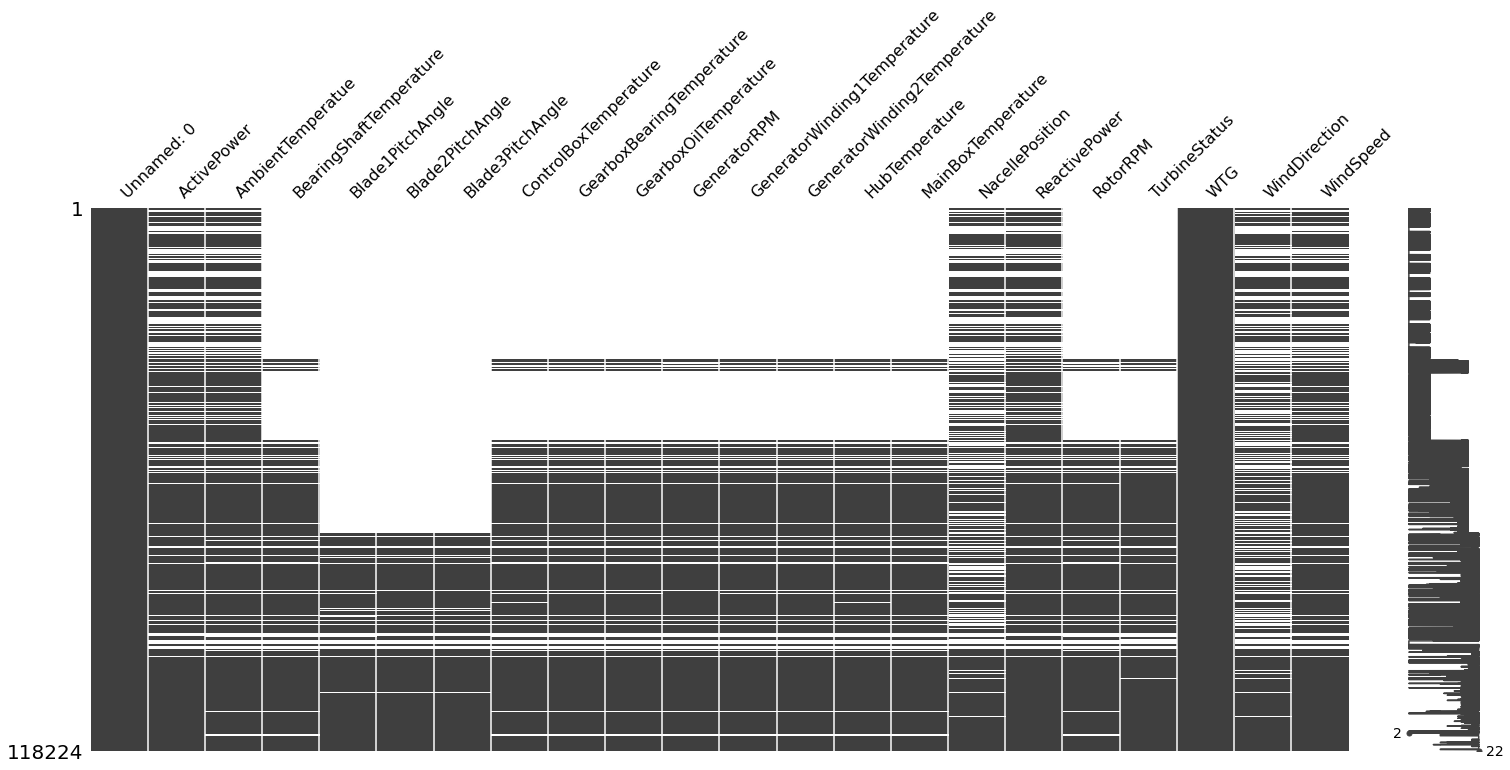

In [83]:
msno.matrix(turbine_df)

There is a weird shape to the data on several of the columns. About halfway down the data, most of the values fill in. With the blade pitch, those values fill in further. 

As I do the analysis, I'm going to run the predictive models with two different data sets. One will use the data the values start to be recorded, and the second will be when blade pitch data is included. 

About three fourths of the way down the data, there are several rows where the data appears blank across all columns. I'll filter that data out as well to improve results. I expect there to be times where values go to zero, like when the wind isn't blowing. But, incomplete data could negatively impact the model and will be eliminated.

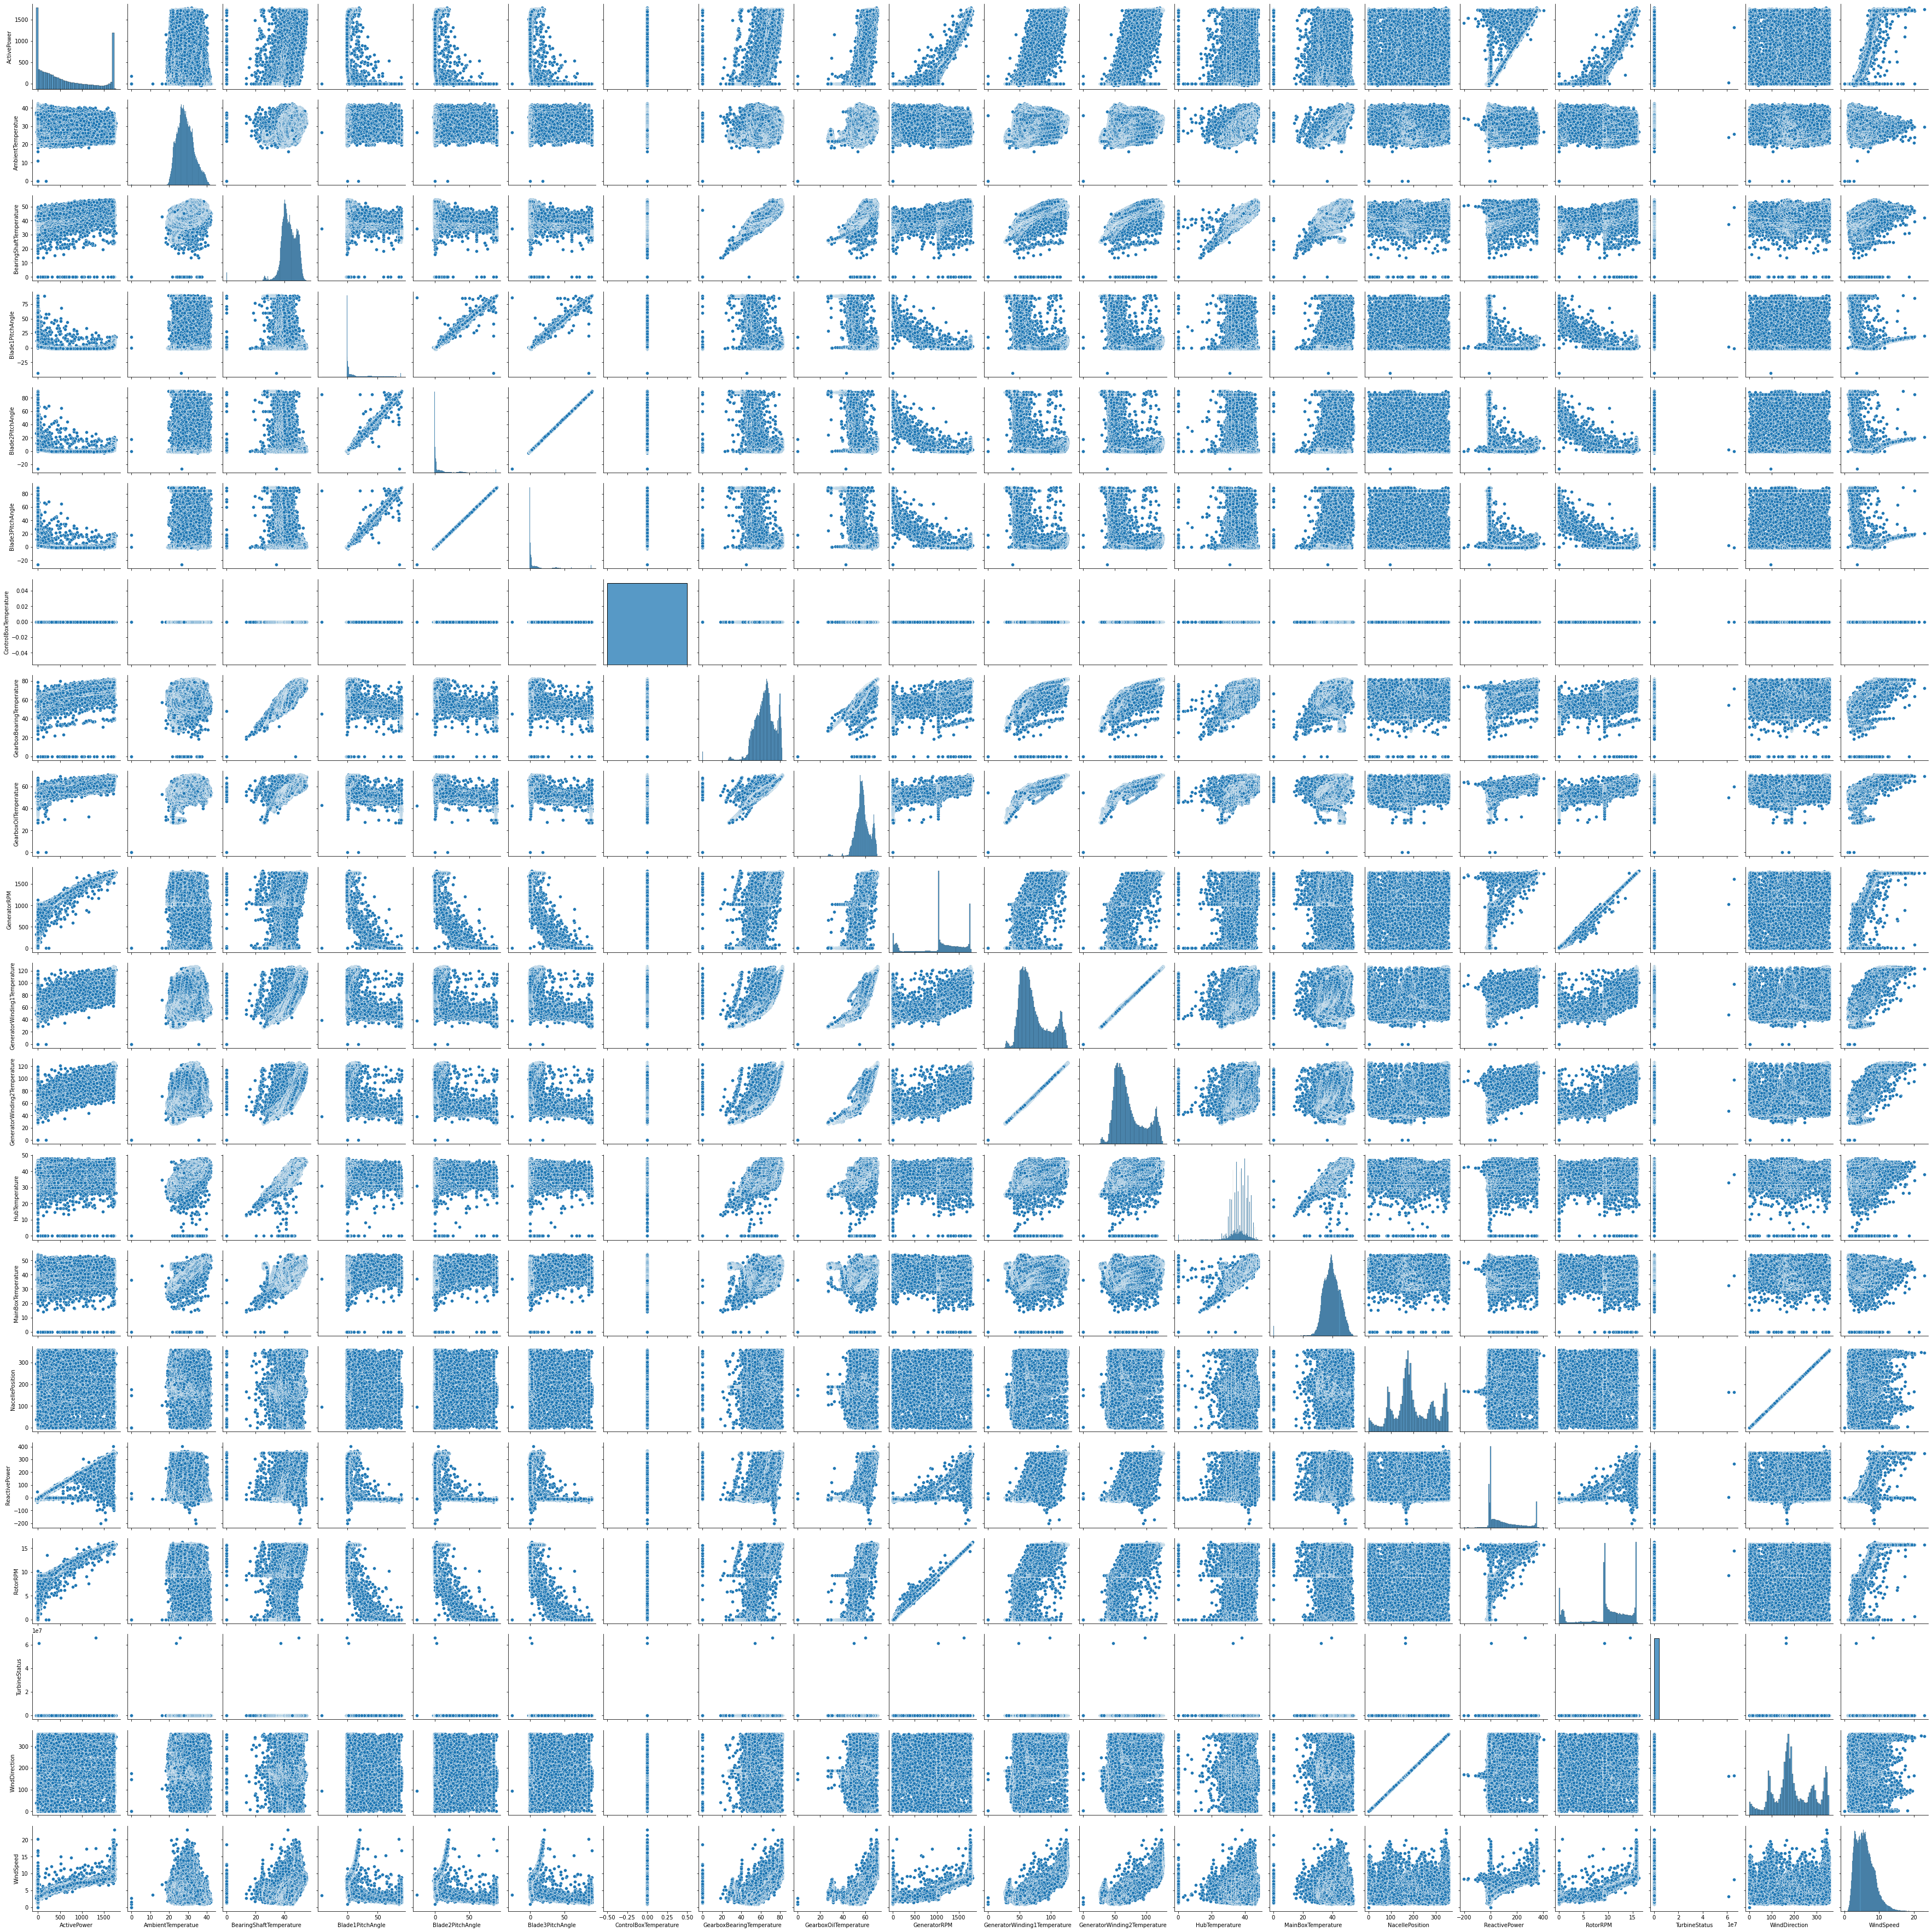

In [84]:
sns.pairplot(turbine_df)

I like using this plotting to get a sense of what the data shape. It is small and hard to read, but when doing deeper data analysis, I'll plot out individual data sets. Even by inspection, I can see some data is right shifted, other data has several spikes, and the power data in the top left has a big peak at the start and end of the graph that will need further exploring. 

In [85]:
print(turbine_df['WTG'].unique())
print(turbine_df['TurbineStatus'].unique())

['G01']
[          nan 0.0000000e+00 2.0000000e+00 1.0000000e+00 7.6800000e+02
 1.0240000e+03 9.6000000e+02 6.1500000e+02 1.6400000e+02 1.4800000e+02
 4.8600000e+02 7.5200000e+02 9.1000000e+02 9.5100000e+02 2.5600000e+03
 1.0240000e+04 8.1920000e+03 1.6384000e+04 1.7270000e+03 2.0600000e+02
 5.1300000e+02 2.7100000e+02 3.0900000e+02 5.3000000e+01 5.1200000e+02
 9.2200000e+02 9.6700000e+02 8.7100000e+02 3.4300000e+02 9.7300000e+02
 9.6400000e+02 7.6900000e+02 5.6000000e+01 3.0000000e+00 5.8000000e+01
 2.7000000e+01 2.8500000e+02 4.7800000e+02 1.8100000e+02 3.3000000e+01
 2.2000000e+02 3.5100000e+02 7.8000000e+01 1.3500000e+02 5.2000000e+01
 2.4500000e+02 1.9300000e+02 1.2900000e+02 1.5400000e+02 1.0400000e+02
 4.0000000e+00 5.4700000e+02 7.5620000e+03 2.7000000e+02 2.8000000e+01
 3.4200000e+02 1.1500000e+02 7.5000000e+01 5.5000000e+01 5.7000000e+01
 3.8000000e+01 4.5500000e+02 3.5900000e+02 4.8500000e+02 4.8200000e+02
 3.9800000e+02 4.8400000e+02 4.1000000e+02 1.8000000e+02 2.8800000e+0

The WTG column only contains one code that appears unimportant. It'll be removed as part of the data cleaning. 

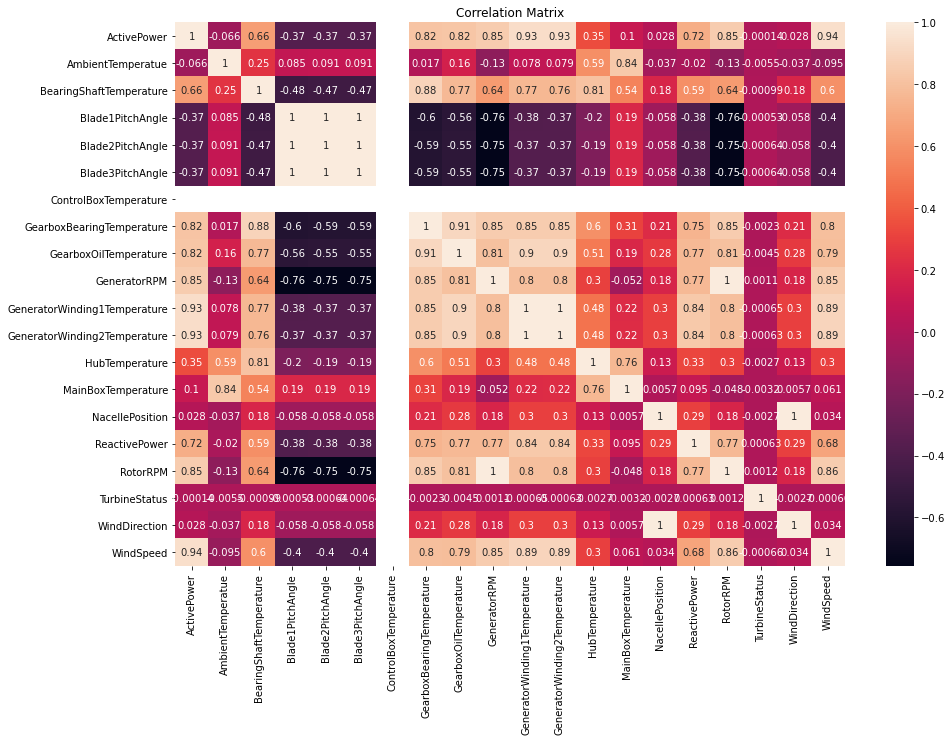

<Figure size 432x288 with 0 Axes>

In [86]:
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(turbine_df.corr(), annot=True, ax=ax)
plt.title('Correlation Matrix')
plt.show()
plt.clf()

The correlation matrix is useful for getting a high level intuition on relationships. Right from the start it is clear that multiple values are closely related. Some are obvious like wind speed and rotor RPM. Others are less correlated than I would have expected. The main box temperature has almost no connection to the power output, when I anticipated the heat generated from power production would more closely correlate. Instead, there is almost no correlation. 

The wind blade angles are all perfectly correlated with each other. Basically, the pitch of one blade is the pitch of all three blades. The rotor and generator are also perfectly correlated. This also makes sense given both rotate together at the same rate given they are physically coupled together. The same holds for the nacel position and wind direction. As the wind changes so does the nacel position. 

While all of these are interesting correlations, from quick inspection the blade position is weakly negative correlated. The nacel position is almost not correlated at all. The RPM's do have a strong initial correlation. 

As further data cleaning is completed, it will be interesting to see how these values change when the NAN values are removed. 

### Purge Bad Data and Cleaning

The first thing I want to do is split the date and time apart. The time has seconds data that isn't needed, and there is a +00:00 data that can also be cleaned. Having it broken out by date and hour will allow for day over day and week over week comparisons. 

In [87]:
turbine_df['date'] = turbine_df['Unnamed: 0'].apply(lambda x: x.split(' ')[0])
turbine_df['time_full'] = turbine_df['Unnamed: 0'].apply(lambda x: x.split(' ')[-1])
turbine_df['time_short'] = turbine_df['time_full'].apply(lambda x: x.split(':00+')[0])
turbine_df

Unnamed: 0  ActivePower  AmbientTemperatue  \
0       2017-12-31 00:00:00+00:00          NaN                NaN   
1       2017-12-31 00:10:00+00:00          NaN                NaN   
2       2017-12-31 00:20:00+00:00          NaN                NaN   
3       2017-12-31 00:30:00+00:00          NaN                NaN   
4       2017-12-31 00:40:00+00:00          NaN                NaN   
...                           ...          ...                ...   
118219  2020-03-30 23:10:00+00:00    70.044465          27.523741   
118220  2020-03-30 23:20:00+00:00    40.833474          27.602882   
118221  2020-03-30 23:30:00+00:00    20.777790          27.560925   
118222  2020-03-30 23:40:00+00:00    62.091039          27.810472   
118223  2020-03-30 23:50:00+00:00    68.664425          27.915828   

        BearingShaftTemperature  Blade1PitchAngle  Blade2PitchAngle  \
0                           NaN               NaN               NaN   
1                           NaN               NaN               NaN   
2                           NaN               NaN               NaN   
3                           NaN               NaN               NaN   
4                           NaN               NaN               NaN   
...                         ...               ...               ...   
118219                45.711129          1.515669          1.950088   
118220                45.598573          1.702809          2.136732   
118221                45.462045          1.706214          2.139664   
118222                45.343827          1.575352          2.009781   
118223                45.231610          1.499323          1.933124   

        Blade3PitchAngle  ControlBoxTemperature  GearboxBearingTemperature  \
0                    NaN                    NaN                        NaN   
1                    NaN                    NaN                        NaN   
2                    NaN                    NaN                        NaN   
3                    NaN                    NaN                        NaN   
4                    NaN                    NaN                        NaN   
...                  ...                    ...                        ...   
118219          1.950088                    0.0                  59.821165   
118220          2.136732                    0.0                  59.142038   
118221          2.139664                    0.0                  58.439439   
118222          2.009781                    0.0                  58.205413   
118223          1.933124                    0.0                  58.581716   

        GearboxOilTemperature  ...  NacellePosition  ReactivePower  RotorRPM  \
0                         NaN  ...              NaN            NaN       NaN   
1                         NaN  ...              NaN            NaN       NaN   
2                         NaN  ...              NaN            NaN       NaN   
3                         NaN  ...              NaN            NaN       NaN   
4                         NaN  ...              NaN            NaN       NaN   
...                       ...  ...              ...            ...       ...   
118219              55.193793  ...            178.0      13.775785  9.234004   
118220              54.798545  ...            178.0       8.088928  9.229370   
118221              54.380456  ...            178.0       4.355978  9.236802   
118222              54.079014  ...            190.0      12.018077  9.237374   
118223              54.080505  ...            203.0      14.439669  9.235532   

        TurbineStatus  WTG  WindDirection  WindSpeed        date  \
0                 NaN  G01            NaN        NaN  2017-12-31   
1                 NaN  G01            NaN        NaN  2017-12-31   
2                 NaN  G01            NaN        NaN  2017-12-31   
3                 NaN  G01            NaN        NaN  2017-12-31   
4                 NaN  G01            NaN        NaN  2017-12-31   
...               ...  ...         

As a quick check, I'll plot the counts of the time column to see if any data is missing. 

Total Value Count:  118224


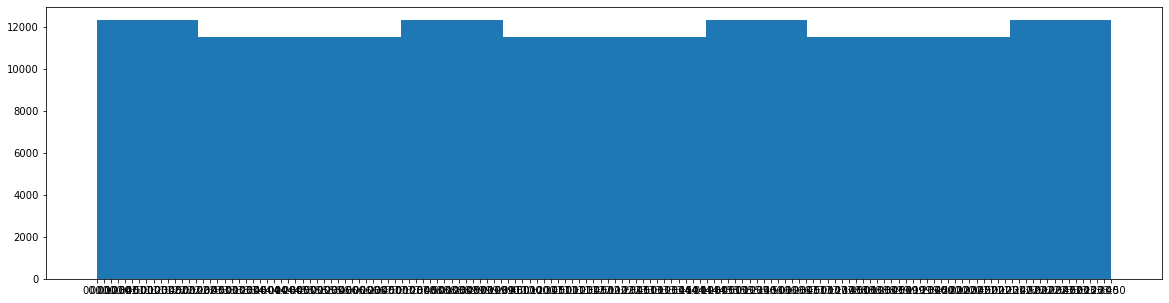

In [88]:
print('Total Value Count: ', turbine_df['time_short'].count())
time_array = turbine_df['time_short'].unique()
plt.figure(figsize = (20,5))
plt.hist(turbine_df['time_short'])
plt.show()

The graph is messy, but conveys that there is some missing times in the data. Without a continuous run of time, some of the conventions for day of the week will get messed up later on in the data. I'll need to deal with this when I map days of the week. 

Now that the time column has been broken up between day and time. I am now going to cleanse all of the rows with no data. I am assuming this is either time the equipment was being serviced or data to the monitoring system was corrupted. 

In [89]:
#This code will find all of the NaN values and create a moving average based on a three hour window\
# or 18 interval lengths. It won't be a perfect measure, but the best indicator will be nearby values.
#indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=36) #create an index for a window
#for col in turbine_df.columns:
    #turbine_df_meaned[col] = turbine_df[col].ewm(span=10).mean()
    #print(col)   
turbine_df_no_nan = turbine_df.fillna(0)
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=12)
turbine_df_meaned = turbine_df_no_nan.rolling(window=indexer, min_periods=1).mean()

#turbine_df_meaned = turbine_df.rolling(90, win_type='gaussian').sum(std=3)
#turbine_df_meaned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ActivePower                   118224 non-null  float64
 1   AmbientTemperatue             118224 non-null  float64
 2   BearingShaftTemperature       118224 non-null  float64
 3   Blade1PitchAngle              118224 non-null  float64
 4   Blade2PitchAngle              118224 non-null  float64
 5   Blade3PitchAngle              118224 non-null  float64
 6   ControlBoxTemperature         118224 non-null  float64
 7   GearboxBearingTemperature     118224 non-null  float64
 8   GearboxOilTemperature         118224 non-null  float64
 9   GeneratorRPM                  118224 non-null  float64
 10  GeneratorWinding1Temperature  118224 non-null  float64
 11  GeneratorWinding2Temperature  118224 non-null  float64
 12  HubTemperature                118224 non-nul

ActivePower  AmbientTemperatue  BearingShaftTemperature  \
0          0.000000           0.000000                 0.000000   
1          0.000000           0.000000                 0.000000   
2          0.000000           0.000000                 0.000000   
3          0.000000           0.000000                 0.000000   
4          0.000000           0.000000                 0.000000   
...             ...                ...                      ...   
118219    52.482239          27.682769                45.469437   
118220    48.091682          27.722526                45.409014   
118221    50.511084          27.762408                45.345827   
118222    65.377732          27.863150                45.287718   
118223    68.664425          27.915828                45.231610   

        Blade1PitchAngle  Blade2PitchAngle  Blade3PitchAngle  \
0               0.000000          0.000000          0.000000   
1               0.000000          0.000000          0.000000   
2               0.000000          0.000000          0.000000   
3               0.000000          0.000000          0.000000   
4               0.000000          0.000000          0.000000   
...                  ...               ...               ...   
118219          1.599873          2.033878          2.033878   
118220          1.620924          2.054825          2.054825   
118221          1.593630          2.027523          2.027523   
118222          1.537337          1.971452          1.971452   
118223          1.499323          1.933124          1.933124   

        ControlBoxTemperature  GearboxBearingTemperature  \
0                         0.0                   0.000000   
1                         0.0                   0.000000   
2                         0.0                   0.000000   
3                         0.0                   0.000000   
4                         0.0                   0.000000   
...                       ...                        ...   
118219                    0.0                  58.837954   
118220                    0.0                  58.592151   
118221                    0.0                  58.408856   
118222                    0.0                  58.393564   
118223                    0.0                  58.581716   

        GearboxOilTemperature  GeneratorRPM  GeneratorWinding1Temperature  \
0                    0.000000      0.000000                      0.000000   
1                    0.000000      0.000000                      0.000000   
2                    0.000000      0.000000                      0.000000   
3                    0.000000      0.000000                      0.000000   
4                    0.000000      0.000000                      0.000000   
...                       ...           ...                           ...   
118219              54.506463   1030.036402                     58.207328   
118220              54.334630   1030.077817                     57.994069   
118221              54.179992   1030.050263                     57.841424   
118222              54.079760   1030.006483                     57.745100   
118223              54.080505   1029.834789                     57.694813   

        GeneratorWinding2Temperature  HubTemperature  MainBoxTemperature  \
0                           0.000000        0.000000            0.000000   
1                           0.000000        0.000000            0.000000   
2                           0.000000        0.000000            0.000000   
3                           0.000000        0.000000            0.000000   
4                           0.000000        0.000000            0.000000   
...                              ...             ...                 ...   
118219                     57.277352       39.005427           36.171700   
118220                     57.059495       39.004551           36.095484   
118221                     56.895871       39.003815           36.017937   
118222                     5

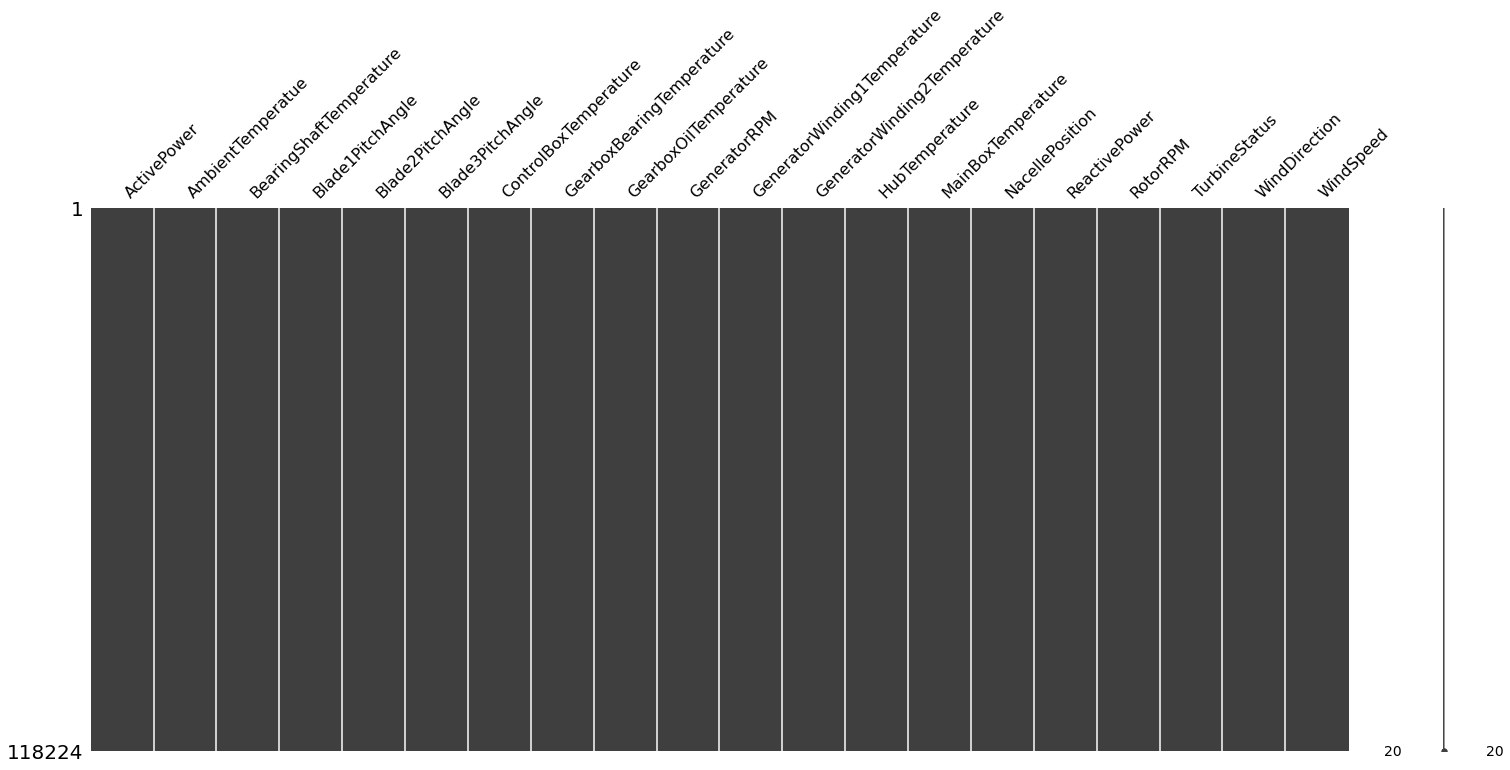

In [90]:
msno.matrix(turbine_df_meaned)
turbine_df_meaned.info()
turbine_df_meaned

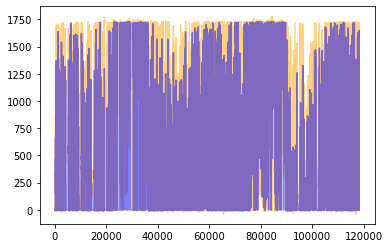

0.91648612353637


<Figure size 432x288 with 0 Axes>

In [91]:
plt.plot(turbine_df['ActivePower'], alpha = .5, color = 'orange')
plt.plot(turbine_df_meaned['ActivePower'], alpha = .5, color = 'blue')
plt.show()
plt.clf()
print(turbine_df['ActivePower'].corr(turbine_df_meaned['ActivePower']))

In [92]:
columns = turbine_df_meaned.columns
print(columns)
corr_matrix = []
for col in columns:
    corr_matrix.append(turbine_df[col].corr(turbine_df_meaned[col]))
for i in range(len(columns)):
    print('\nHeading: ', columns[i], "correlation: ", corr_matrix[i])

Index(['ActivePower', 'AmbientTemperatue', 'BearingShaftTemperature',
       'Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle',
       'ControlBoxTemperature', 'GearboxBearingTemperature',
       'GearboxOilTemperature', 'GeneratorRPM', 'GeneratorWinding1Temperature',
       'GeneratorWinding2Temperature', 'HubTemperature', 'MainBoxTemperature',
       'NacellePosition', 'ReactivePower', 'RotorRPM', 'TurbineStatus',
       'WindDirection', 'WindSpeed'],
      dtype='object')

Heading:  ActivePower correlation:  0.91648612353637

Heading:  AmbientTemperatue correlation:  0.7877558730361202

Heading:  BearingShaftTemperature correlation:  0.6416616566654627

Heading:  Blade1PitchAngle correlation:  0.8358435196377209

Heading:  Blade2PitchAngle correlation:  0.8304993386971429

Heading:  Blade3PitchAngle correlation:  0.8304993386971429

Heading:  ControlBoxTemperature correlation:  nan

Heading:  GearboxBearingTemperature correlation:  0.7276288443285506

Heading:  GearboxOilTe

The work done up to this point was to start creating values that can fill in for NAN values. With almost all of these values being continuous value, a weighted exponential window will create values that can fill in for the NAN values. I'm only going to fill in values that are greater than .91 correlated. This way the models built later will have more data for fitting. This will also be better than leaving the values as NAN or deleting the NaN values. 

It is clear from the original data that about half of the features do not show up until the mid point of the data. That will be worked out as I create the different dataframes further on in this work. 

The other advantage is these features are all highly correlated with power production. 

In [93]:
corr_columns = ['ActivePower', 'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature', \
                'ReactivePower', 'WindSpeed']
turbine_df_filled = turbine_df
for col in corr_columns:
    turbine_df_filled[col].update(turbine_df_meaned[col])

#turbine_df_filled #Uncomment to see full dataframe

Now that there are values replaced for NaN. Now the different dataframes mentioned earlier can be created. 

In [94]:
turbine_df_full = turbine_df_filled[['date', 'time_short','ActivePower', 'AmbientTemperatue',\
                                    'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature',\
                                     'NacellePosition', 'ReactivePower', 'WindSpeed']].reset_index()

turbine_df_half = turbine_df_filled.loc[50000:].reset_index()
#turbine_df_half # cuncomment to see full dataframe

So the first dataframe is easy to put together. The tougher part will be trying to find the point where the balance of the data is beyond the middle split in the data. To start, I'll plot the bearing shaft temperature as it is one of the features that starts later in the dataset. 

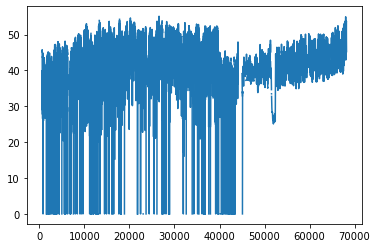

In [95]:
plt.plot(turbine_df_half['BearingShaftTemperature'])
#plt.xticks(range(len(turbine_df_half['BearingShaftTemperature'])),np.str(turbine_df_half['date']))
plt.show()

I'm sure I could have written a function to find the exact label where the data starts or open the data in Excel to find the exact line this function starts recording data. But, the eyeball approach should be close enough. 

I've now got my two dataframes, and can start doing an in depth analysis of the data's shape to see how I further want to transform the data. 

# The Shape of Data

To start, I want to inspect the histogram further of my active power graph to understand the shape and see what pruning is needed. 

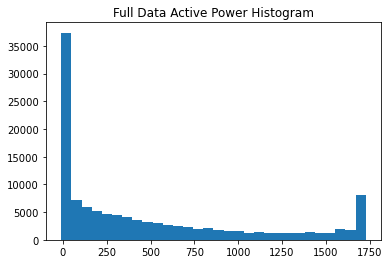

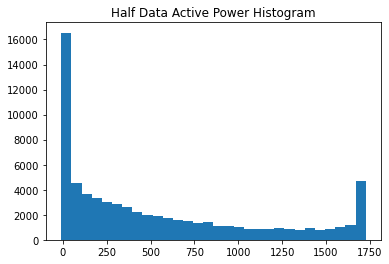

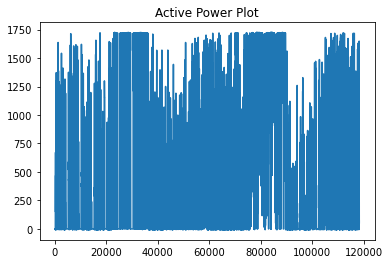

<Figure size 432x288 with 0 Axes>

In [96]:
plt.hist(turbine_df_full['ActivePower'], bins = 30)
plt.title("Full Data Active Power Histogram")
plt.show()
plt.clf()

plt.hist(turbine_df_half['ActivePower'], bins = 30)
plt.title("Half Data Active Power Histogram")
plt.show()
plt.clf()

plt.plot(turbine_df_full['ActivePower'])
plt.title('Active Power Plot')
plt.show()
plt.clf()

So there is a large bump at the end of the data. It looks like it starts at around 1700. Lets see how much of the data is at the end of the histogram. 

In [97]:
print(turbine_df_full.ActivePower[turbine_df_full['ActivePower']>1700].count())
print(turbine_df_full.ActivePower[turbine_df_full['ActivePower']>1700].count()/len(turbine_df_full['ActivePower'])*100)

6754
5.712884016781702


So 6754 values are at the end or roughly 5.7% of the the data in the program. Looking at my correlation maxtrix, I would expect my wind speed to highly correlate with the higher power output given the correlation is .94. First I'll look at the wind speed histogram to get a sense of the shape of data. 

I'm going to overlay the wind speed plot with the active power. I'll use two different scales to try to make the comparison on the scales easier. 

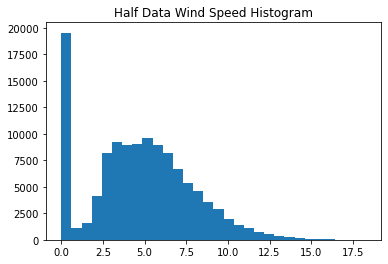

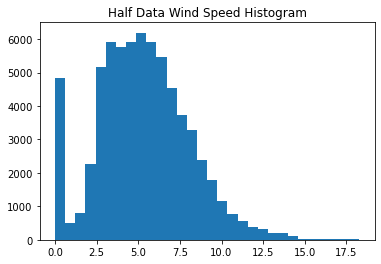

<Figure size 432x288 with 0 Axes>

In [98]:
plt.hist(turbine_df_full['WindSpeed'], bins = 30)
plt.title("Half Data Wind Speed Histogram")
plt.show()
plt.clf()

plt.hist(turbine_df_half['WindSpeed'], bins = 30)
plt.title("Half Data Wind Speed Histogram")
plt.show()
plt.clf()

So the values of wind speed fall off at higher levels. There isn't a corresponding spike in output power with the wind speed. It would be good to further investigate the model before determining if the data is bad. Also notice that the wind and power output both share a large percentage of time at zero with the large hump around the zero mark. The imbalance will make for an interesting time when it comes to fit the data. 

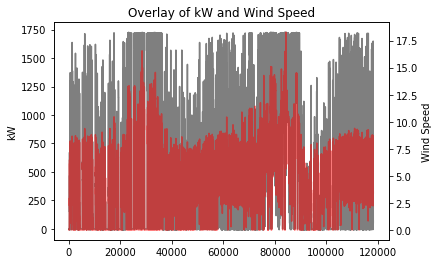

In [99]:
fig, ax1 = plt.subplots()
ax2 = plt.twinx()

plt.title('Overlay of kW and Wind Speed')
ax1.plot(turbine_df_full['ActivePower'], color = 'black', alpha = .5)
ax1.set_ylabel('kW')
ax2.plot(turbine_df_full['WindSpeed'], color = 'red', alpha = .5)
ax2.set_ylabel('Wind Speed')
plt.show()

Looking at the overlay, it looks like as the wind speed gets above 11 to 12 mph for the kW to max out. This will skew the data slightly as we see in the histogram is we have a max output kW while the wind speed can go much higher. For fun, i'll create a small dataframe to see what wind speed will cause the system to max out. The next piece is a bit of digression but might be good for developing an intuition on the data. 

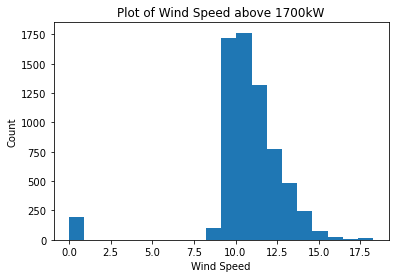

In [100]:
df_1750 = turbine_df_full[turbine_df_full['ActivePower'] > 1700]
#df_1750

plt.title('Plot of Wind Speed above 1700kW')
plt.hist(df_1750['WindSpeed'], bins = 20)
plt.xlabel('Wind Speed')
plt.ylabel('Count')
plt.show()


So it looks like any time the wind speed gets above 10 mph. It will be interesting to see how the learning models handle the higher level of wind speed while the kW is maxed out. 

This does indicate I shouldn't prune the spike at the end of the kW histogram. It'll skew the data, but should be included to reflect the limits of the machine. 

Now I want to take a look at the shape of the other trends in the data. To speed up the review, I am going to try to do a violin plot with each feature against active power. To make the comparison easier, I'll normalize the data for each feature. There are different ways to normalize the data. I chose a basic normalization to get a sense of the data shape. With the final data model build I'll apply more exotic normalization techniques, and fix skew in the data. 

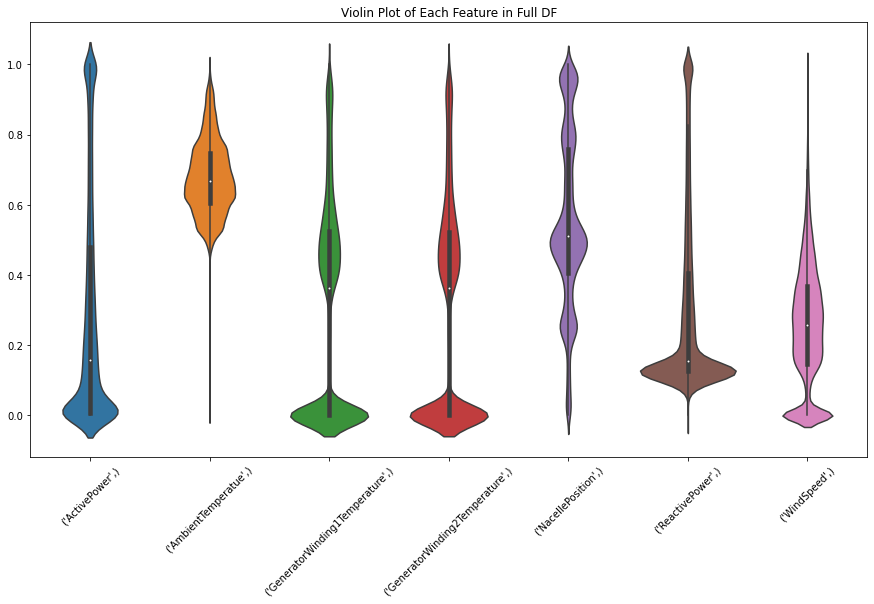

<Figure size 432x288 with 0 Axes>

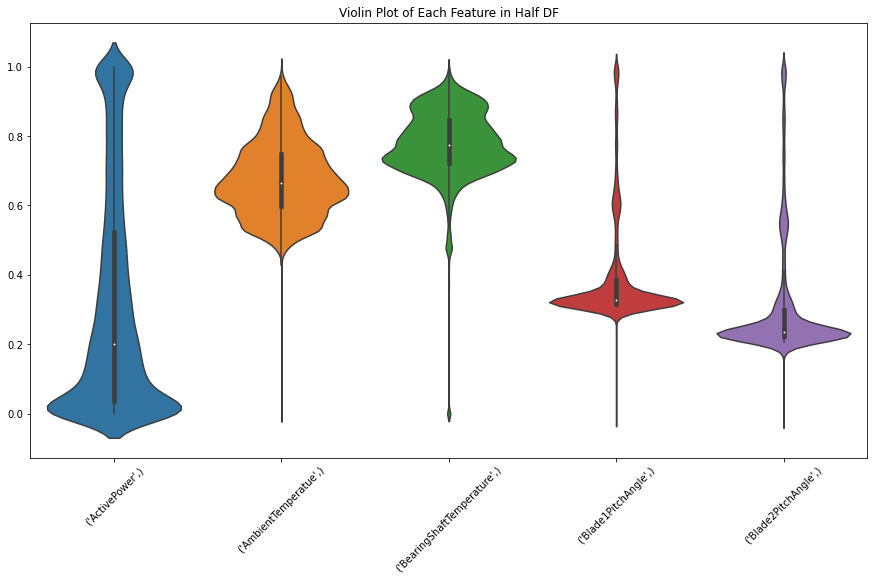

<Figure size 432x288 with 0 Axes>

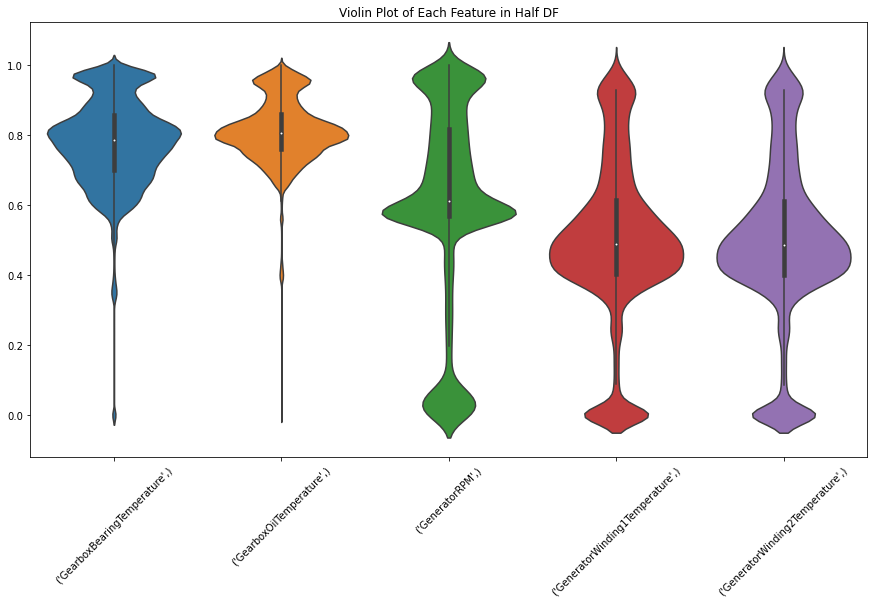

<Figure size 432x288 with 0 Axes>

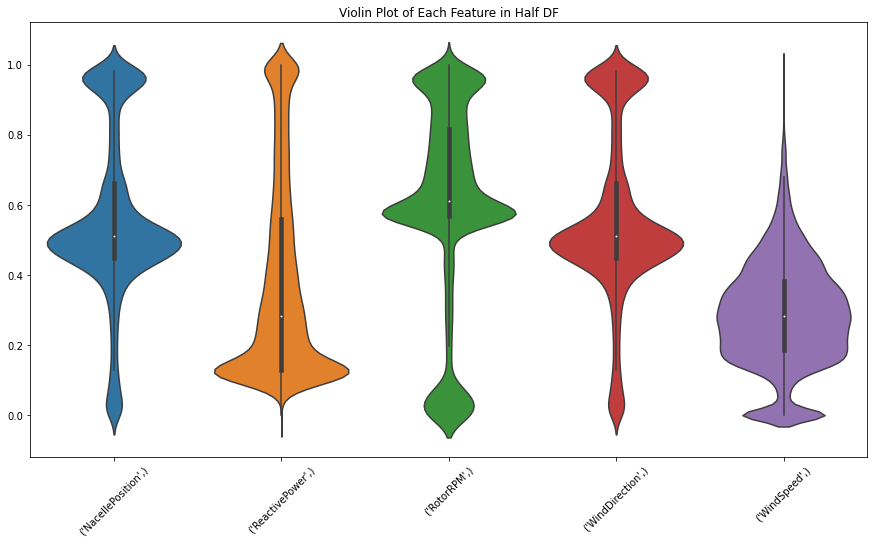

<Figure size 432x288 with 0 Axes>

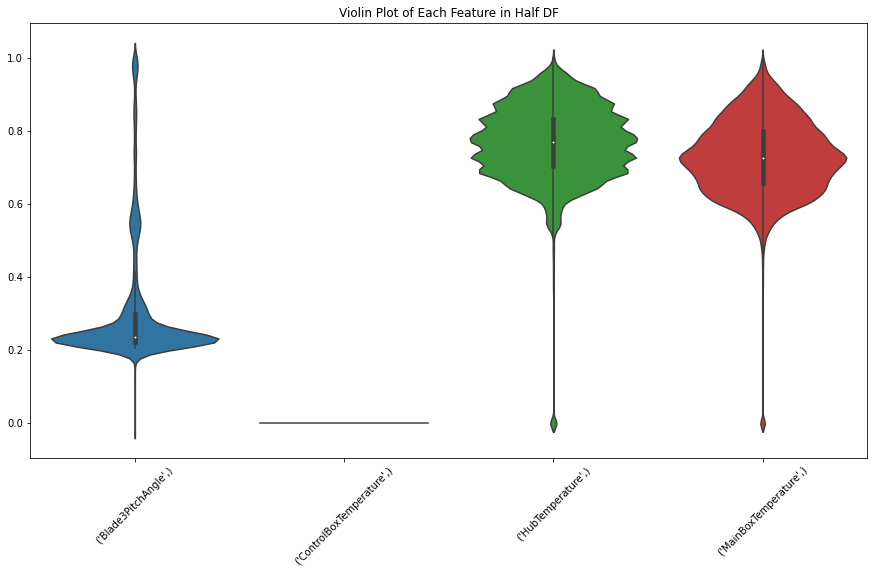

<Figure size 432x288 with 0 Axes>

In [101]:
features = ['ActivePower', 'AmbientTemperatue',\
            'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature',\
            'NacellePosition', 'ReactivePower', 'WindSpeed']

# Listed out the features to strip out the date and time data
turbine_df_mod = turbine_df_full[features]
scaler = MinMaxScaler()
scaler.fit(turbine_df_mod) #scale the values from 0 to 1
turbine_df_full_norm = pd.DataFrame(scaler.transform(turbine_df_mod)) #transform the scales and put into a data frame
turbine_df_full_norm.columns = [features] # Put column headings back on data


turbine_df_full_norm.head()

plt.figure(figsize = (15,8))
plt.title('Violin Plot of Each Feature in Full DF')
plt.xticks(rotation=45)
sns.violinplot(data = turbine_df_full_norm)
plt.show()
plt.clf()

#Reapeat the same thing but for the turbine half data
features2 = [['ActivePower', 'AmbientTemperatue', 'BearingShaftTemperature',\
               'Blade1PitchAngle', 'Blade2PitchAngle'], ['GearboxBearingTemperature',\
               'GearboxOilTemperature', 'GeneratorRPM', 'GeneratorWinding1Temperature',\
               'GeneratorWinding2Temperature'],\
               ['NacellePosition', 'ReactivePower', 'RotorRPM',\
               'WindDirection', 'WindSpeed'], ['Blade3PitchAngle',\
               'ControlBoxTemperature','HubTemperature', 'MainBoxTemperature']]
for feat in features2:
    turbine_df_mod2 = turbine_df_half[feat]
    scaler = MinMaxScaler()
    scaler.fit(turbine_df_mod2) #scale the values from 0 to 1
    turbine_df_half_norm = pd.DataFrame(scaler.transform(turbine_df_mod2)) #transform the scales and put into a data frame
    turbine_df_half_norm.columns = [feat]

    plt.figure(figsize = (15,8))
    plt.title('Violin Plot of Each Feature in Half DF')
    plt.xticks(rotation=45)
    sns.violinplot(data = turbine_df_half_norm, scale ='width')
    plt.show()
    plt.clf()



Looking at the different shapes of the violin plots, it is clear some options have a similar distribution profile to the out put power. Reactive power and active power are almost identical, which is expected given they share the relationship through the power triangle. Rotor RPM and windspeed also have a good similar distribution with active power. Most of the temperature distirubtions are similar to each other, but don't have as strong of a relationship. The blade position is very closely distirbuted around one point, and the control box temperature doesn't seem to have any good data. I'll remove that from the final dataset for putting together a better dataset for creating a fit. 

So let's take stock of what has been done up to this point, and the story behind it. We want to know how much power this wind turbine will output. We can see that the max power is 1700kW to 1750kW. The best obvious predictor of power output is the wind speed followed closely by generator and rotor RPM. Since all of those items are electromechanically connected together, this makes sense that they would be highly correlated together. 

Other items like wind direct, turbine status, and turbine blade position do not have correlate to power output or may even be slightly uncorrelated. 

Before building the machine learning model, it would be interesting to break down power output with a heat map by day, week, month, and year to see if there is seasonality to the power output. 

# As Hot As a Heat Map

I want to get a better feel for minutes, hourly, weekly, and monthly/seasonal effects on power production. It will be great to understand how the system performs using the different metrics. 

### Minute and Hourly Data Intervals


To start with, it would be good to plot the power output over the course of 24 hours. To do that, we need to group the different time intervals together. A quick histogram with variance bars will show the shape of the performance over the day.

The data is broken down in ten minute increments and will be plotted denoting the hours. This way we can see if there is a trend at the minute and hour level.

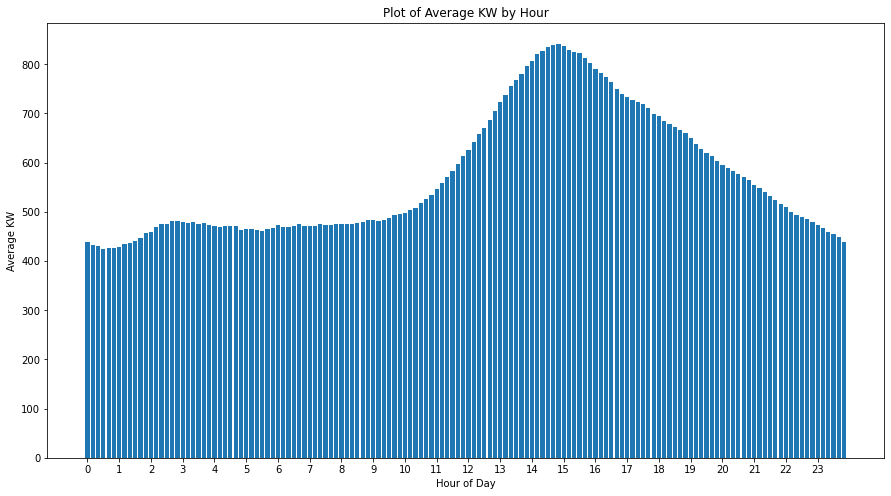

<Figure size 432x288 with 0 Axes>

In [102]:
time_df = turbine_df_full[turbine_df_full['ActivePower'] > 0].pivot(columns = 'time_short',\
                               index = 'date',\
                               values = 'ActivePower').mean().reset_index()
#uncomment to add error bars with standard deviation
#time_df_std = turbine_df_full[turbine_df_full['ActivePower'] > 0].pivot(columns = 'time_short',\
#                                          index = 'date',\
#                                          values = 'ActivePower').std().reset_index()
#time_df['StandardDev'] = time_df_std[0]

#Set ticks for plot
time_tick = []
hour_label = []
time_tick.extend(range(0,144,6))
hour_label.extend(range(0,24))

fig, ax = plt.subplots(1,1, figsize = (15,8))
ax.bar(range(len(time_df['time_short'])), time_df[0])
ax.set_xticks(time_tick)
ax.set_xticklabels(hour_label)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Average KW')
ax.set_title('Plot of Average KW by Hour')
plt.show()
plt.clf()

#Uncomment to see plot with large error bars
#plt.figure(figsize = (15,8))
#plt.bar(range(len(time_df['time_short'])), time_df[0], yerr = time_df['StandardDev'])
#plt.show()
#plt.clf()


This graph turned out to be more interesting than I expected. There is a clear trend that in the afternoon between twelve PM and seven PM there is an elevated average power output. My understanding is wind production is better at night given the changes in temperature causes the wind below. Here wind production on average is strongestr in the afternoon. Without knowing the location of the wind turbine, there may be a local impact with geological conditions improving wind production in the afternoon. 

I did attempt to make a bar plot with error bars, but my  results were less than impressive. I calculated the standard deviation of the average power, and many of the error bars were below zero. Over the course of the plot, the standard deviation was well above +/- 600kW. Even though the average produces a nice plot with a clear trend, there is a bunch of noise in the system. 

Now for fun, I'll check if there is any trend in weekly data by creating a heat map. 

### Weekly Heat Map

To start, my current data doesn't contain any information by day of the week. It would make sense to map days of the week to the existing data. From there, I can do a pivot table to filter the data by day and by time. From there a heat map can be created. 

The first entry is December 31, 2017, which was a Saturday. The mapping will start on a Saturday, and increment from there. I'll map this information in a new Date column. Each day has 120 entries for time. I'll fill up an array with the dates until I hit 118224, which is the total number of entries for the data set. I know from the earlier plot that I have some missing dates and times. Thankfully, the Timestamp function will map the day and month based on the date given. I am not going to try to fill in the missing data as I am assuming either that data was corrupted or the equipment was out for repairs. This would mean that there isn't any data to approximate and can be ignored.

Thinking ahead, my next section is going to be filtering by month. I am going to go ahead a clean up day of the week and month now. 

Instead of mapping the month. I'll parse the information and create a new Month column.  

In [110]:
turbine_df_full['Day'] = turbine_df_full['date'].apply(lambda x: pd.Timestamp(x).day_name())
turbine_df_half['Day'] = turbine_df_full['date'].apply(lambda x: pd.Timestamp(x).day_name())
turbine_df_full['Month'] = turbine_df_full['date'].apply(lambda x: pd.Timestamp(x).month_name())
turbine_df_half['Month'] = turbine_df_full['date'].apply(lambda x: pd.Timestamp(x).month_name())

Now I'll do something similar to the hours data, except this time I'll create a pivot table that takes into account the days of the week over a 24 hour period instead of an average of all days of the week. A heat map will be best for displaying the data to get a sense of the values. 

Text(0.5, 1.0, 'Heatmap of Power by Day and Hour')

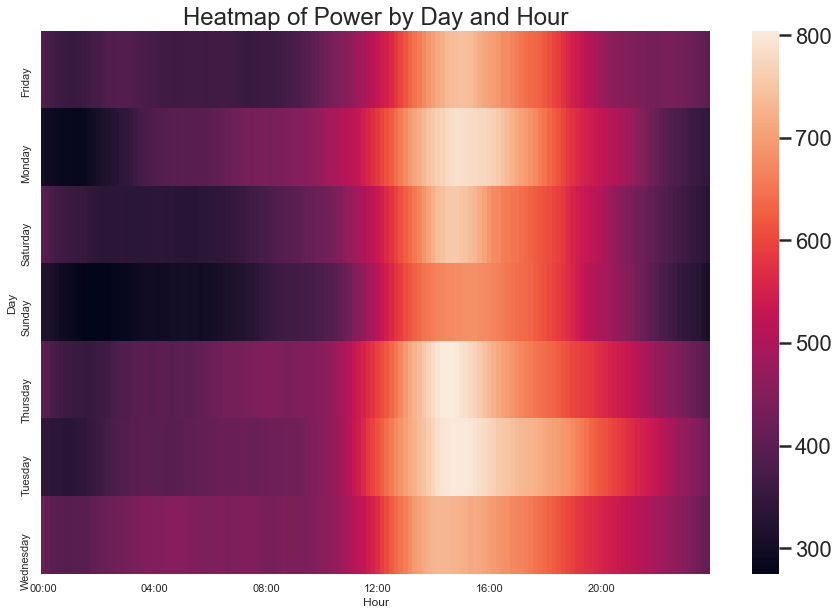

In [139]:
week_heat = turbine_df_full.pivot_table(columns = 'time_short', \
                                        index = 'Day', \
                                        values = 'ActivePower', \
                                        aggfunc ='mean')

fig, ax = plt.subplots(1,1, figsize = (15,10))
sns.set_context('poster')
sns.heatmap(week_heat, xticklabels = 24, yticklabels = True)
ax.set_xlabel('Hour')
ax.set_title('Heatmap of Power by Day and Hour')

From the heat map, a general comment can be said that it doesn't matter what day of the week we are dealing with. The afternoon is the common day of the week to see the highest level of power output. It does appear that power output is the lowest on Sunday and Monday mornings. This could be the time maintenance is being taken on the equipment resulting in lower power levels. Further questioning would need to be provided by the data provider to see if that is an accurate assessment. 

### Production by Month

